## 다중회귀분석에서 다룰 내용
- 단순회귀 프로시저를 다중회귀 프로시저로 확장해 다중공선성과 같은 문제의 가능한 원인을 주시한다.
- 선형모델 방정식에서 각 항의 중요성을 이해한다.
- 변수를 여러 개 사용하고, 변수 간의 상호작용을 통해 예측하는 능력을 향상시킨다.
- 다항식 확장을 활용해 비선형 함수의 선형모델 적합을 증가시킨다.

In [1]:
'''
단순회귀분석에서 했던 것처럼
여러 특성 사용
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model

In [2]:
%matplotlib inline

In [3]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

In [4]:
observations = len(dataset)
variables = dataset.columns[:-1] #모든 columns slicing
X = dataset.iloc[:,:-1]
y = dataset['target'].values

### 파이썬 pandas DataFrame의 iloc, loc, ix의 차이
pandas DataFrame에서 index를 통해 해당하는 row를 찾을 때 사용하는 \
.iloc, .loc, .ix는 겉보기에 다르지 않지만 각각의 용도가 다르다고 한다.

- .iloc \
integer positon를 통해 값을 찾을 수 있다. label로는 찾을 수 없다.\

- .loc

label 을 통해 값을 찾을 수 있다. integer position로는 찾을 수 없다.\

- .ix (삭제됨)

integer position과 label모두 사용 할 수 있다. 만약 label이 숫자라면 label-based index만 된다.

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
'''
편향 벡터(단위값을 가진 상수 변수)를 포함하는 열을 추가한 후 XC라고 명명해 입력행렬을 준비하자
'''
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model= linear_regression.fit()

In [7]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 04 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        23:01:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 단순선형회귀에서 언급할 수 없었던 추가적인 특성
- 조정된 R(Adj. R-squared)을 주목해야한다.아주 많은 예측변수를 사용하는 경우 그것의 측정값은 R-squared로 부터 상당히 벗어날 것이다.
- 표준 R-squared와 조정된 R-squared 측정값 사이의 비율이 20%를 초과하면 모델에 중복변수가 있음을 의미한다. 당연히 비율이 더 크면 문제는 심각하다.
- 한 번에 많은 변수로 작업하는 경우 계수에 중요한 경고가 있는지 확인해야 한다. 관련된 위험은 노이즈가 많은 계수 또는 중요하지 않은 정보를 얻는 것과 같은 것이다. 일반적으로 이런 계수는 0에서 멀리 떨어져 있지 않으며, 큰 표준오차로 인해 눈에 뛸 것이다. 이들을 발견할 수 있는 적합한 도구는 t-테스트이다.
- p값이 낮은 변수는 모델에서 제거할 수 있는 좋은 후보가 된다.
- 일반적으로 조건수가 30을 초과하면 불안정한 결과로 인해 신뢰도가 낮아진다. 예측은 크게 오류를 나타낼 수 있으며, 하위 집합 또는 다른 관찰 집합을 사용해 동일한 회귀분석을 다시 실행하면 계수가 크게 달라질 수 있다.
- 예제인 경우 조건수가 30을 훨씬 초과하므로 심각한 경고 표시이다.

## 공식을 대안으로 사용
statsmodels.formula.api를 사용해 동일한 결과를 얻고, Pasty 패키지에 해석될 공식을 설명하기 위해 다음을 사용한다.

In [8]:
linear_regression = smf.ols(formula='target~CRIM+ZN+INDUS+\
                           CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + \
                           LSTAT', data = dataset)
fitted_model = linear_regression.fit()

이 경우 모든 변수를 분석해 모델 구축에 입력하려면 공식의 오른쪽에 이름을 지정해 넣어야 한다.\
모델을 적합시킨 후에는 계수 및 결과를 보고하기 위해 이전에 살펴본 모든 Statsmodels 메소드를 사용할 수 있다.

## 상관행렬
단일 예측변수를 사용해 모델링할 때 예측변수와 목표변수 사이의 선형 연관 계수를 추정하기 위해\
피어슨의 상관계수(Pearson's correlation)을 사용했다.\
이제부터 분석에 변수가 많아지며 여전히 각 예측변수가 응답에 얼마나 연관이 있는지에 관심을 가질 것이다.\
그러나 예측변수의 분산과 목표변수의 분산 사이의 관계가 고유한 것인지 또는 공유된 분산에 의해 발생한 것인지를 구별해야한다.


In [9]:
'''
공유분산의 존재를 확인하는 가장 직접적인 방법
'''
X = dataset.iloc[:,:-1]
correlation_matrix = X.corr()
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

개략적으로 DIS와 TAX, NOX, INDUS 사이의 상관관계가 높게 나타난다.\
DIS는 고용센터와의 거리, NOX는 오염지수, INDUS는 해당지역의 상업용 건물 또는 비주거용 건물의 지분 그리고 TAX는 재산세율을 나타낸다.\
이런 변수들을 올바르게 조합하면 어떤 곳이 생산적인 지역인지를 잘 알 수 있다.
더 빠르지만 덜 숫자적인 표현은 상관관계의 히트맵(heat map)을 구축하는 것이다.

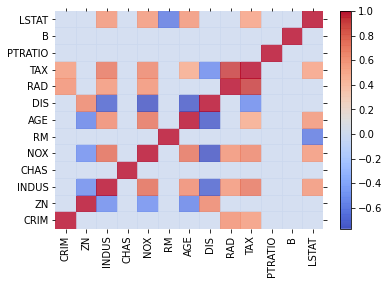

In [10]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0])+0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', \
                   top='off', left='off', right = 'off')
    plt.colorbar()
    plt.show()
visualize_correlation_matrix(X, hurdle = 0.5)

In [11]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [12]:
print(eigenvalues)

[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


In [13]:
print(eigenvectors[:,8])

[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


In [14]:
# 변수의 이름을 출력해 고유 벡터를 구성하는데 어떤 변수가 크게 기여하는지 파악
print(variables[2], variables[8], variables[9])

INDUS RAD TAX


다중공선성의 위험 요소 변수를 찾았으면 그런 변수에 어떠한 개선책을 사용할 수 있을까? \
그 중 일부를 제거하는 것이 최선의 해결책이며, \ 
 6장, '일반화 달성'에서 변수 선택이 어떻게 작동하는지를 탐구할 때 자동화된 방식으로 수행될 것이다.

## 특성조정
모든 특성을 동일한 스케일로 맞추는 작업을 특성조정이라 한다.\
특성 조정은 표준화 또는 정규화를 통해 달성할 수 있다.\
정규화는 모든 변수를 구간 0과 1 사이로 재조정 한다. \
표준화는 평균을 제거하고 표준편차로 나누어 단위 분산을 구하는 방식으로 작동한다\
여기서는 표준화가 더 바람직한데 그 이유는 얻어진 표준화된 계수를 원래 스케일로 쉽게 되돌릴 수 있기 때문이다.\
또한 모든 특성을 평균 0에 집중시켜 많은 머신러닝 알고리즘에 의해 오차 표면을 더욱 다루기 쉽도록 하기 때문이다. \
표준화는 변수의 최솟갑소가 최댓값을 재조정하는 것보다 훨씬 효과적인 방법이다.
- 특성을 조정할 때 중요한 점은 특성의 스케일을 변경하면 변수가 재조정된 적이 없는 것처럼 계수를 다시 계산할 수 있는 경우가 아니라면 재조정된 특성을 예측에도 사용해야 한다는 것이다.

In [15]:
'''
Scikit-learn의 preprocessing 모듈에 기반한 표준화를 사용해 알고리즘을 시도
'''
from sklearn.preprocessing import StandardScaler
observations = len(dataset)
variables = dataset.columns
standardization = StandardScaler()
standardization.fit(X)
Xst= standardization.fit_transform(X)
original_means = standardization.mean_

original_vars = standardization.var_
original_stds = original_vars**(1/2)
Xst = np.column_stack((Xst, np.ones(observations)))
y= dataset['target'].values

In [16]:
import random
def random_w(p):
    return np.array([np.random.normal() for j in range(p)])
def hypothesis(X,w):
    return np.dot(X,w)
def loss(X,w,y):
    return hypothesis(X,w) -y
def squared_loss(X,w,y):
    return loss(X,w,y)**2
def gradient(X,w,y):
    gradients = list()
    n = float(len(y))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y)*X[:, j])/n)
    return gradients
def update(X,w,y, alpha = 0.01):
    return [t- alpha*g for t, g in zip(w, gradient(X,w,y))]
def optimize(X,y, alpha = 0.01, eta= 10**12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X, new_w,y))
        w = new_w
        if k>=5 and (new_SSL-SSL <= eta and \
                    new_SSL-SSL >= eta):
            path.append(new_SSL)
            return w, path
        if k%(iterations/20) ==0:
            path.append(new_SSL)
    return w, path
alpha = 0.02
w, path = optimize(Xst, y, alpha, eta=10**12, \
                  iterations = 20000)
print("These are our final standardized coefficients:" + ', \
'.join(map(lambda x: "%0.4f" %x, w)))

These are our final standardized coefficients:-0.9281, 1.0816, 0.1409, 0.6817, -2.0567, 2.6742, 0.0195, -3.1040, 2.6622, -2.0768, -2.0606, 0.8493, -3.7436, 22.5328


## 비표준화 계수
선형회귀분석에서 표준화된 계수 벡터와 편향이 주어지면, 다음과 같은 선형회귀 공식을 호출할 수 있다. \
y = b0 + b1x1 + b2x2 ... \
평균 및 표준편차를 사용해 예측변수를 변환하는 이전 공식은 몇 번의 계산을 거치면 실제로 다음과 동일하다. \
y = b0 + b1z1 + b2z2 ...

In [17]:
unstandardized_betas = w[:-1]/original_stds
unstandardized_bias = w[-1] - np.sum((original_means/original_stds)*w[:-1])
print('%8s: %8.4f' %('bias', unstandardized_bias))
for beta, varname in zip(unstandardized_betas, variables):
    print('%8s: %8.4f' %(varname, beta))

    bias:  36.4595
    CRIM:  -0.1080
      ZN:   0.0464
   INDUS:   0.0206
    CHAS:   2.6867
     NOX: -17.7666
      RM:   3.8099
     AGE:   0.0007
     DIS:  -1.4756
     RAD:   0.3060
     TAX:  -0.0123
 PTRATIO:  -0.9527
       B:   0.0093
   LSTAT:  -0.5248


## 특성 중요도 평가
구축한 선형모델의 계수값을 확인하고 모델이 올바르게 작동하는지 이해하는데 필요한 기본적인 통계를 조사한 뒤, \
예측이 어떻게 이뤄졌는지 먼저 파악해 작업 감사를 시작할 수 있다.\
예측되는 값의 구성에서 각 변수의 역할을 설명함으로써 이것을 얻을 수 있다.\
계수에 대해 수행해야 할 첫 번째 감사는 그들이 표현하는 방향성에 있으며, 이는 단순한 기호에 의해 구분된다.\
두 번째 감사는 모델에 미치는 변수의 영향에 대해 실행한다.\
목표를 단순히 현재의 데이터를 가장 효과적으로 적합시키는 것이 아니라 미래의 데이터에도 잘 적합시키도록 하려면,\
오킹의 면도날 이론을 적용할 필요가 있다.\
이는 좀 더 정확한 답을 고려할 때 복잡한 모델보다 더 단순한 모델을 항상 선호한다는 의미이다.

In [18]:
linear_regression = linear_model.LinearRegression(normalize = False,
                                                 fit_intercept = True)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization,\
                                     linear_regression)

In [20]:
linear_regression.fit(X,y)
for coef, var in sorted(zip(map(abs, linear_regression.coef_),\
                           dataset.columns[:-1]), reverse=True):
    print("%6.3f %s" %(coef,var))

17.767 NOX
 3.810 RM
 2.687 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.108 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


In [21]:
'''
변수를 표준화했을 때
'''
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), \
                           dataset.columns[:-1]), reverse = True):
    print("%6.3f %s" %(coef, var))

 3.744 LSTAT
 3.104 DIS
 2.674 RM
 2.662 RAD
 2.077 TAX
 2.061 PTRATIO
 2.057 NOX
 1.082 ZN
 0.928 CRIM
 0.849 B
 0.682 CHAS
 0.141 INDUS
 0.019 AGE


## R**2으로 모델비교
일반적인 관점에서 간단한 평균과 관련해 얼마나 잘 수행되는지를 비교함으로써 모델을 평가할 수 있다.\
바로 결정계수 R**2이다.

In [22]:
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False, \
                                                 fit_intercept = True)
def r2_est(X,y):
    return r2_score(y, linear_regression.fit(X,y).predict(X))
print('Baseline R2: %0.3f' %r2_est(X,y))

Baseline R2: 0.741


In [23]:
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i !=j]
    r2_impact.append(((r2_est(X,y) - \
                     r2_est(X.values[:, selection], y)), dataset.columns[j]))
for imp, varname in sorted(r2_impact, reverse=True):
    print('%6.3f %s' % (imp,varname))

 0.056 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 CRIM
 0.006 TAX
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


모든 차이를 파악한 뒤, R**2에 대한 각 변수의 기여도를 나타내는 각 변수에 순위를 매기면 선형모델의 오차를 줄이는 데 어떤 변수가 더 많이 기여하는지 알 수 있다. 이는 어떤 변수가 응답값에 가장 많이 기여했는지 아는 것과 다른 관점이다. 이러한 기여를 부분 R**2(partial R-squared)이라고 한다.

## 상호작용 모델
- 예측변수를 다양한 방법으로 변환해 선형회귀를 개선할 수 있다.
- 모든 변환이 잔차오차의 양에 영향을 미치고 궁극적으로 결정계수에 영향을 미치므로, 부분 R**2을 사용해 이런 개선을 측정할 수 있다.

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False, \
                                                 fit_intercept = True)
create_interactions = PolynomialFeatures(degree=2, \
                                        interaction_only=True, include_bias = False)

In [25]:
def r2_est(X,y):
    return r2_score(y, linear_regression.fit(X,y).predict(X))
baseline = r2_est(X,y)
print('Baselline R2: %0.3f' %baseline)

Baselline R2: 0.741


In [26]:
Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

In [31]:
for k, effect in enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = variables[:-1][effect==1]
506
    increment = r2_est(Xi[:, list(range(0, main_effects))\
                         +[main_effects+k]], y) - baseline
    if increment > 0.01:
        print('Adding interaction %8s *%8s, R2: %5.3f' %\
             (termA, termB, increment))

Adding interaction     CRIM *    CHAS, R2: 0.011
Adding interaction     CRIM *      RM, R2: 0.021
Adding interaction       ZN *      RM, R2: 0.013
Adding interaction    INDUS *      RM, R2: 0.038
Adding interaction    INDUS *     DIS, R2: 0.013
Adding interaction      NOX *      RM, R2: 0.027
Adding interaction       RM *     AGE, R2: 0.024
Adding interaction       RM *     DIS, R2: 0.018
Adding interaction       RM *     RAD, R2: 0.049
Adding interaction       RM *     TAX, R2: 0.054
Adding interaction       RM * PTRATIO, R2: 0.041
Adding interaction       RM *       B, R2: 0.020
Adding interaction       RM *   LSTAT, R2: 0.064


관련 상호작용 효과는 변수 RM(앞에서 본 것처럼 가장 중요한 것 중의 하나)으로 명확하게 나타나며, 다른 주요 특성인 LSTAT와의 상호작용을 통해 가장 강력한 개선효과가 나타난다.\
중요한 것은 위의 두 가지를 단순하게 곱한 값을 원본 데이터 행렬에 추가하는 것이다.

In [32]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']
print('R2 of a model with RM*LSTAT interaction: %0.3f' %r2_est(Xi,y))

R2 of a model with RM*LSTAT interaction: 0.805


## 다항식 회귀
- 다항식 확장은 예측변수의 수를 빠르게 증가시킨다.
- 더 높은 차수의 다항식은 예측변수의 높은 거듭제곱으로 해석돼 숫자 안정성에 문제가 있으므로 적절한 숫자 형식이 필요하거나 아주 큰 숫자값을 표준화해야 한다.

### 선형 대 3차 변환 테스트
앞에서 본 PolynomialFeatures 함수에서 interaction_only 파라미터를 off로 설정하면, 이전과 같은 상호작용뿐만 아니라 입력 행렬의 완전한 다항식 변환을 얻을 수 있다.

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
linear_regression = linear_model.LinearRegression(\
                                                 normalize=False, fit_intercept=True)
create_cubic = PolynomialFeatures(degree=2, \
                                 interaction_only=False, include_bias=False)
create_quadratic = PolynomialFeatures(degree=2, \
                                     interaction_only=False, include_bias=False)
linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic, \
                                   linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

PolynomialFeatures와 LinearRegression을 모두 파이프라인으로 전송하여 단일 명령을 통해 자동으로 함수를 생성하고 데이터를 확장하고 회귀할 수 있다. 한 번에 모든 변수를 확장할 수 있음을 기억하면서 명확하게 하기 위해 실험적으로 LSTAT 변수만 모델링 해보자.

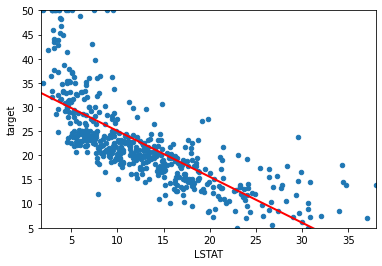

In [38]:
predictor = 'LSTAT'
x = dataset['LSTAT'].values.reshape((observations,1))
xt = np.arange(0,50,0.1).reshape((500, 1))
x_range = [dataset[predictor].min(), dataset[predictor].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

scatter = dataset.plot(kind='scatter', x=predictor, y='target',\
                      xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt),
                        '-', color='red', linewidth=2)
plt.show()

첫 번째는 간단한 선형회귀이며(단순선형회귀), 산포도에서 응답의 LSTAT와 관련된 점 구름을 직선이 잘 표현하지 못한다는 것을 알 수 있다.
곡선이 필요할 것 같아 보인다. 포물선으로 변하는 2도 변환을 테스트하는 대신 즉시 3차 변환을 시도한다. 두 개의 곡선을 사용하면 좀 더 나은 적합 결과를 얻을 것이다.

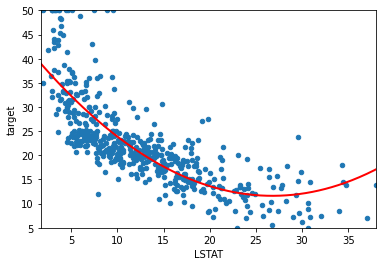

In [39]:
scatter = dataset.plot(kind = 'scatter', x=predictor, y= 'target', \
                      xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)
plt.show()

그래픽 검사를 통해 LSTAT와 응답이 얼마나 관련이 있는지 조금 더 확실하게 확인할 수 있다. 더 높은 수준의 변환을 사용하면 더 좋아질 수 없을까에 대한 의문도 제기할 수 있다.

## 더 높은 차수의 솔루션 제공
더 높은 차수의 다항식 변환을 테스트하기 위해, 다항식 확장을 생성하고 R2 측정을 보고 하는 스크립트를 준비한다. 그런 다음 시리즈에서 가장 높은 차수의 함수를 플롯하고 데이터가 어떻게 적합되는지 살펴본다.

In [40]:
for d in [1,2,3,5,15]:
    create_poly = PolynomialFeatures(degree=d, \
                                    interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(), \
                         linear_regression)
    model = poly.fit(x,y)
    print("R2 degree - %2i polynomial : %0.3f" \
         %(d,r2_score(y,model.predict(x))))

R2 degree -  1 polynomial : 0.544
R2 degree -  2 polynomial : 0.641
R2 degree -  3 polynomial : 0.658
R2 degree -  5 polynomial : 0.682
R2 degree - 15 polynomial : 0.695


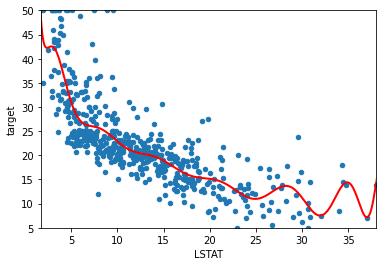

In [42]:
scatter = dataset.plot(kind='scatter', x=predictor,\
                      y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, model.predict(xt), '-',\
                        color='red', linewidth=2)
plt.show()

결과 곡선을 면밀히 관찰하면, 높은 차수에서의 곡선은 예측변숫값 범위의 가장자리에서 밀도가 약해질 때 불규칙하게 변하면서 엄격하게 점의 분포를 따르는 경향이 있다는 것을 알 수 있다.

## 과소 적합과 과잉 적합 소개
과도한 파라미터화로 인한 성능 저하는 성형회귀 및 기타 많은 머신 러닝 알고리즘의 문제다.\
추가하는 파라미터가 많을수록 모델이 데이터의 규칙 및 규칙성을 가로막는 것을 멈추기 때문에 적합도가 높아지지만, 데이터에 존재하는 불규칙하고 잘못된 정보로 많은 계수를 채우기 시작할 것이다. 이런 상황에서 모델은 일반 규칙을 학습하지 않고 단지 데이터셋 자체를 다른 형식으로 기억할 것이다.\
이를 과잉 적합이라한다.\
과소적합은 반면 예측에 너무 적은 파라미터를 사용하는 경우다. 간단한 예제는 단순선형회귀를 이용해 비선형 관계를 적합하는 것이다. 분명히 곡선 밴드와 일치하지 않을 것이고 일부 예측은 호도될 것이다.